In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:

def graph(x, y, color='r', fit_line=True, connect=False):
    plt.figure(figsize=(12,7))
    if connect:
        plt.plot(x, y, color + '-o')
    else:
        plt.plot(x, y, color + 'o')

    A = np.vstack([x, np.ones(len(x))]).T
    line, resid = np.linalg.lstsq(A, y, rcond=None)[:2] # fit line
    k, n = line[0], line[1]
    yfit = [k * xi + n for xi in x]
    if fit_line: plt.plot(x, yfit)
    return (line[0], line[1], resid / (len(x) * np.var(x)))


In [3]:
meritve = {
    'levo': {0: 0, 150: 0.1, 300: 0.23, 450: 0.35, 600: 0.48, 750: 0.61, 900: 0.74, 1050: 0.87, 1200: 1.0, 1350: 1.12, 1500: 1.25, 1650: 1.38, 1800: 1.51, 1950: 1.65, 2100: 1.77, 2250: 1.90, 2400: 2.02, 2550: 2.15, 2700: 2.28, 2850: 2.41, 3000: 2.54},
    'desno': {0: 0, 150: -0.13, 300: -0.26, 450: -0.4, 600: -0.52, 750: -0.63, 900: -0.76, 1050: -0.92, 1200: -1.05, 1350: -1.16, 1500: -1.31, 1650: -1.45, 1800: -1.55, 1950: -1.7, 2100: -1.82, 2250: -1.95, 2400: -2.09, 2550: -2.21, 2700: -2.36, 2850: -2.49, 3000: -2.6}
}
g = 9.81
l = 0.02
d = 0.0069

0.008376296103896107 -0.25055844155843965 5.99432419632338e-09
B = 0.41881480519480535


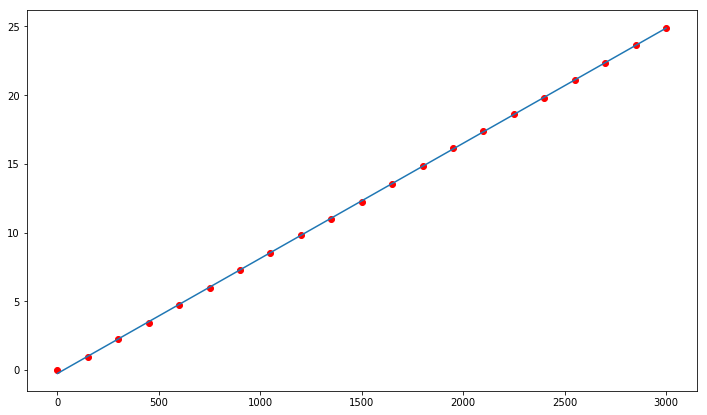

In [6]:
x = [k for k in meritve['levo'].keys()]
y = [meritve['levo'][k]*g for k in meritve['levo'].keys()]
k, n, err = graph(x, y)
print(k, n, err[0])
B1 = k/l
print('B =', B1)

-0.008544467532467535 0.03567272727272469 1.2797574363299052e-08
B = 0.4272233766233768


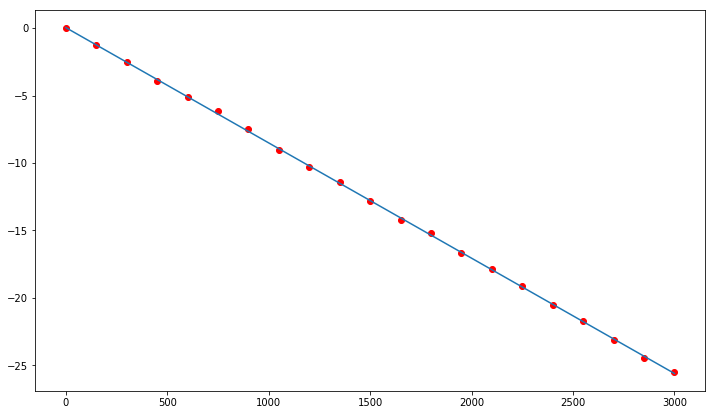

In [7]:
x = [k for k in meritve['desno'].keys()]
y = [meritve['desno'][k]*g for k in meritve['desno'].keys()]
k, n, err = graph(x, y)
B2 = -k/l
print(k, n, err[0])
print('B =', B2)

In [8]:
tok = B1 * d * l
print(tok)
tok = B2* d * l
print(tok)

5.779644311688314e-05
5.8956825974026e-05


[0, 0, 150, 150, 300, 300, 450, 450, 600, 600, 750, 750, 900, 900, 1050, 1050, 1200, 1200, 1350, 1350, 1500, 1500, 1650, 1650, 1800, 1800, 1950, 1950, 2100, 2100, 2250, 2250, 2400, 2400, 2550, 2550, 2700, 2700, 2850, 2850, 3000, 3000]


(0.00846038181818182, -0.14311558441558225, array([8.25943715e-08]))

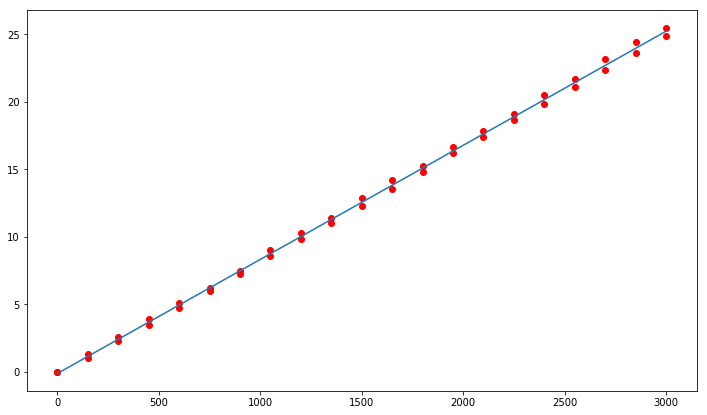

In [5]:
x = []
for k in meritve['levo'].keys():
    x.extend([k]*2)
print(x)
y = []
for k in meritve['levo'].keys():
    y.extend(sorted([meritve['levo'][k]*g, -meritve['desno'][k]*g]))
    
graph(x, y)